In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
oscar = pd.read_csv('movies.csv')

In [414]:
oscar.head(2)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,Parasite,2019,R,08 Nov 2019,132 min,"Comedy, Drama, Horror",Bong Joon Ho,"Bong Joon Ho, Han Jin-won","Kang-ho Song, Sun-kyun Lee, Yeo-jeong Cho",Greed and class discrimination threaten the ne...,...,96,8.5,"737,033",tt6751668,movie,11 Oct 2019,"$53,369,749",NaN,NaN,True
1,Green Book,2018,PG-13,16 Nov 2018,130 min,"Biography, Comedy, Drama",Peter Farrelly,"Nick Vallelonga, Brian Hayes Currie, Peter Far...","Viggo Mortensen, Mahershala Ali, Linda Cardellini",A working-class Italian-American bouncer becom...,...,69,8.2,"461,846",tt6966692,movie,12 Mar 2019,"$85,080,171",NaN,NaN,True


### 1) (Graph) What was the runtime for each movie?


                                             Title  Runtime
0                                         Parasite      132
1                                       Green Book      130
2                               The Shape of Water      123
3                                        Moonlight      111
4                                        Spotlight      129
5  Birdman or (The Unexpected Virtue of Ignorance)      119
6                                 12 Years a Slave      134
7                                             Argo      120
8                                       The Artist      100
9                                The King's Speech      118


<AxesSubplot:ylabel='Title'>

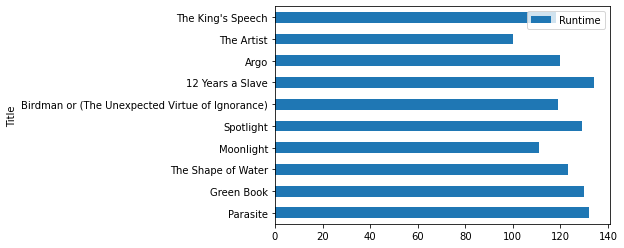

In [415]:
oscar['Runtime'] = oscar['Runtime'].str.extract(r'(\d+)')
oscar['Runtime'] = oscar['Runtime'].astype(int)
runtimes = oscar[['Title', 'Runtime']]
runtimes.sort_values(by='Runtime')
print(runtimes)
runtimes.plot(x="Title", y='Runtime', kind='barh')

#### Answer) The  runtime for each movie can be seen above -  see table and graph

### 2) What movie had the longest runtime?

In [420]:
longest = oscar.sort_values(by=['Runtime'], ascending=False).head(1)
print(longest.Title)

6    12 Years a Slave
Name: Title, dtype: object


#### Answer) The  the longest runtime was 12 Years a Slave.

### 3)  Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?
  

<AxesSubplot:xlabel='Awards', ylabel='Runtime'>

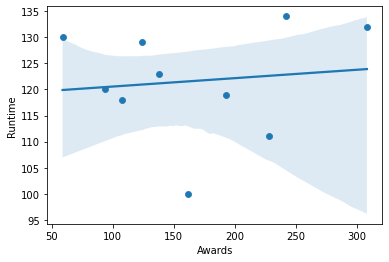

In [421]:
oscar['Awards'] = oscar['Awards'].str.extract(r'([^\.]\d+[^\s])')
oscar['Awards'] = oscar['Awards'].astype(int)
sns.scatterplot(data=oscar, x="Awards", y="Runtime")
sns.regplot(x='Awards',y='Runtime',data=oscar, fit_reg=True) 


#### Answer) There seems to be no correlation between runtime and awards (here considering awards and not oscars specifically - but the data quantity  (10 movies) does not allow further inferences. 

### 4)  (Graph) How many awards and nominations did each movie receive?

   Awards                                            Title
0     308                                         Parasite
6     242                                 12 Years a Slave
3     228                                        Moonlight
5     193  Birdman or (The Unexpected Virtue of Ignorance)
8     162                                       The Artist
2     138                               The Shape of Water
4     124                                        Spotlight
9     108                                The King's Speech
7      94                                             Argo
1      59                                       Green Book


<AxesSubplot:ylabel='Title'>

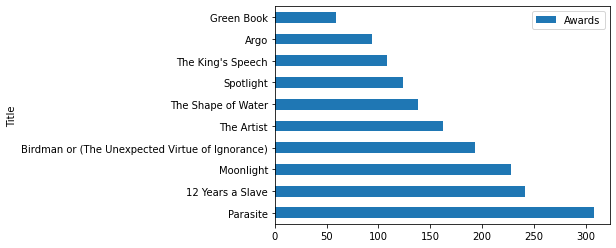

In [400]:
awards = oscar[['Awards', 'Title']]
awards = awards.sort_values(by='Awards', ascending=False)
print(awards)
awards.plot(x="Title", kind='barh')

#### Answer) Above it is shown all awards  each movie received

   Awards                                            Title
2     358                               The Shape of Water
6     337                                 12 Years a Slave
3     296                                        Moonlight
5     292  Birdman or (The Unexpected Virtue of Ignorance)
0     271                                         Parasite
9     206                                The King's Speech
8     204                                       The Artist
7     156                                             Argo
4     143                                        Spotlight
1     124                                       Green Book


<AxesSubplot:ylabel='Title'>

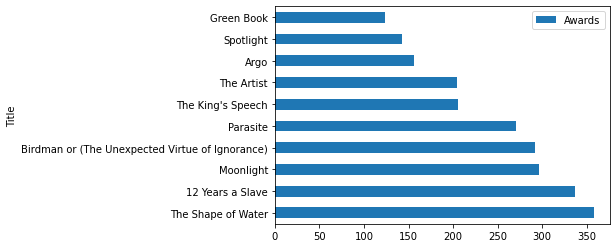

In [422]:
oscar2 = pd.read_csv('movies.csv')
oscar2['Awards'] = oscar2['Awards'].str.extract(r'(?:[^,]*[^0-9,])?(\d+)')
oscar2['Awards'] = oscar2['Awards'].astype(int)
nominations = oscar2[['Awards', 'Title']]
nominations = nominations.sort_values(by='Awards', ascending=False)
print(nominations)
nominations.plot(x="Title", kind='barh')


#### Answer) Above it is shown all nominations  each movie received